In [11]:
# play with blocks
from blockchain.reader import BlockchainFileReader

block_reader = BlockchainFileReader('D:\\bitcoin\\blocks\\blk00001.dat')

limit = 0
for block in block_reader:
    if limit >= 3:
        break
    print("total size: ", block.total_size)
    print("block size: ", block.header.block_size)
    print("merkle hash: ", block.header.merkle_hash) 
    print("header fields: ", dir(block.header) )
    print("transaction fields: ", len(block.transactions) )
    limit += 1

total size:  3159
block size:  3151
merkle hash:  711cb96802ef2d2455f9f006720aa6464cfcd8e23565be05083b768b5ca290d1
header fields:  ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', 'bits', 'block_size', 'from_binary_data', 'magic_number', 'merkle_hash', 'merkle_hash_raw', 'nonce', 'previous_hash', 'previous_hash_raw', 'time', 'timestamp', 'version']
transaction fields:  10
total size:  3308
block size:  3300
merkle hash:  0332e45788d83f10980a2ed174409e254463014b9e87428c802b4543705ed15a
header fields:  ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__

In [59]:
# play with transactions
block_reader = BlockchainFileReader('D:\\bitcoin\\blocks\\blk00001.dat')

limit = 2
for i, block in enumerate(block_reader):
    if i >= limit:
        break
    for transaction in block.transactions:
        #print(transaction.inputs)
        #print(transaction.outputs)
        for output in transaction.outputs:
            print(output)
            try:
                print("Address: ", output.address, "Value: ", output.value/100000000 )
            except TypeError:
                print("something wrong with address")
                
        

Address:  b'1AMbMayPcLwqYjALAVkVPYzaU3tTLotxcZ' Value:  50.0
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
Address:  b'1NFvibcdbx16xKjJSJfLYAgfRXRxJJQTEL' Value:  50.02
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address
something wrong with address


Centroids:  [[ 2.28241935e+02  2.20241935e+02  5.28886613e+04]
 [ 2.29938100e+02  2.21938100e+02 -2.56384098e+03]
 [ 2.23000000e+02  2.15000000e+02  4.63160000e+05]]


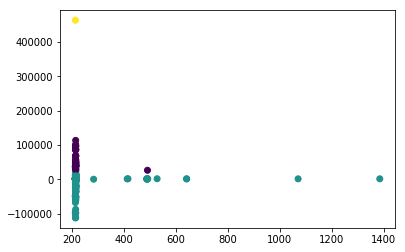

In [49]:
# grab block info and try k-means clustering on them
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
block_reader = BlockchainFileReader('D:\\bitcoin\\blocks\\blk00000.dat')

limit = 1000
prev_timestamp = 1231006505  # set to timestamp for origin block
blockinfo = np.zeros((limit,3), dtype=np.int)

for i, block in enumerate(block_reader):
    if i >= limit:
        break
    blockinfo[i, 0] = np.int(block.total_size)
    blockinfo[i, 1] = np.int(block.header.block_size)
    blockinfo[i, 2] = np.int(block.header.timestamp - prev_timestamp)
    prev_timestamp = block.header.timestamp
    
#print(blockinfo)
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blockinfo)
print("Centroids: ", kmeans.cluster_centers_)  
plt.scatter(blockinfo[:,1],blockinfo[:,2], c=kmeans.labels_, cmap='viridis')

In [70]:
# find the mean and std distance from the nearest centroid
limit = 1000
prev_timestamp = 1231006505
distances = np.zeros(limit)
sample = np.array([0,0,0], dtype=np.int)
for i, block in enumerate(block_reader):
    if i >= limit:
        break
    sample[0] = np.int(block.total_size)
    sample[1] = np.int(block.header.block_size)
    sample[2] = np.int(block.header.timestamp - prev_timestamp)
    dists = [np.sum( np.abs(sample - centroid) ) for centroid in kmeans.cluster_centers_]
    distances[i] = min(dists)

dmean = np.mean(distances)
dstd=np.std(distances)
print('Mean Distance from centroid: ', dmean)
print('STD Distance from centroid: ', dstd)
  
    
# detect anomalies!
limit = 2000
for i, block in enumerate(block_reader):
    if i >= limit:
        break
    sample[0] = np.int(block.total_size)
    sample[1] = np.int(block.header.block_size)
    sample[2] = np.int(block.header.timestamp - prev_timestamp)
    dists = [np.sum( np.abs(sample - centroid) ) for centroid in kmeans.cluster_centers_]
    min_dist = min(dists)
    # pick a value for what's anomalous taking 5x standard deviation as a reasonable start
    if abs(min_dist - dmean) > (5 * dstd):
        #print("dist normalized: ", abs(min_dist - dmean))
        print("Anomalous Block: ", block.header.merkle_hash)
        

Mean Distance from centroid:  72446793.611
STD Distance from centroid:  138393.56063052095
Anomalous Block:  9eba997652c77978e528641328c7224f9990afb40a6d57f985759dd704f4ef9e
Anomalous Block:  eae7ed786bae7403015e9e1e8d12d01bb69fc1e1a2970780047f77ca6e7ac460
Anomalous Block:  7bce53c079af3d6fc5c97354faeab46349acce6b81080babd06c68af024ed87d
